In [18]:
import numpy as np
import os as os
from geometric_clustering import Geometric_Clustering
import networkx as nx
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import pandas as pd
import pickle
import pylab as plt
from sklearn import metrics

In [69]:
NGraphs = 50    # number of realisations
n_t = 20
folder = '/data/gosztolai/geocluster/'

#Girvan-Newman
p_in = np.round(np.concatenate((np.linspace(0.15,0.34,20),np.linspace(0.36,0.42,4))),2) #edge prob. inside clusters
z_out = (0.5-p_in)/3*96 #node degree between clusters

#Fan
w_in = np.round(np.linspace(1.0,1.7,8),1) #edge weight inside clusters

In [211]:
def fracCIN(C,D):
    m = int(max(C)+1)
    n = int(max(D)+1)
    Mi = np.zeros(n)
    p = 0
    for i in range(m):
        for j in range(n):
            Mi[j] = len(np.intersect1d(np.where(C==i), np.where(D==j), assume_unique=True))
    
        ki = np.argmax(Mi) 
        p += Mi[ki]

    return p/len(C)

In [214]:
labels_gt = np.concatenate((np.zeros(32),np.ones(32),2*np.ones(32),3*np.ones(32)))
NGraphs = 100    # number of realisations
#Girvan-Newman
os.chdir(folder + 'Girvan_Newman')
meannMI_GN = np.zeros(len(p_in)); stdnMI_GN = np.zeros(len(p_in)) 
meanfracCC_GN = np.zeros(len(p_in)); stdfracCC_GN = np.zeros(len(p_in))        

for i in range(len(p_in)):
    nMI = np.zeros(NGraphs); fracCC = np.zeros(NGraphs)
    for k in range(NGraphs):
        filename = 'graph_' + str(k) + '_p_in_' + str(p_in[i]) + '_cluster.pkl'
        stability_results = pickle.load(open(filename,'rb'))
        labels = np.array(stability_results[1]['community_id'].values)
        nMItemp = np.zeros(n_t)
        fracCCtemp = np.zeros(n_t)
        for l in range(n_t):
            nMItemp[l] = metrics.normalized_mutual_info_score(labels_gt,labels[l],average_method='arithmetic')
            fracCCtemp[l] = fracCIN(labels_gt, labels[l])

        nMI[k] = np.max(nMItemp)
        fracCC[k] = np.max(fracCCtemp)

    meannMI_GN[i] = np.mean(nMI)
    stdnMI_GN[i] = np.std(nMI) 
    meanfracCC_GN[i] = np.mean(fracCC)
    stdfracCC_GN[i] = np.std(fracCC) 

In [218]:
NGraphs = 50    # number of realisations
#Fan
os.chdir(folder + 'Fan')
meannMI_Fan = np.zeros(len(w_in)); stdnMI_Fan = np.zeros(len(w_in)) 
meanfracCC_Fan = np.zeros(len(w_in)); stdfracCC_Fan = np.zeros(len(w_in)) 
for i in range(len(w_in)):
    nMI = np.zeros(NGraphs)
    for k in range(NGraphs):
        filename = 'graph_' + str(k) + '_w_in_' + str(w_in[i]) + '_cluster.pkl'
        stability_results = pickle.load(open(filename,'rb'))
        labels = np.array(stability_results[1]['community_id'].values)
        nMItemp = np.zeros(n_t)
        fracCCtemp = np.zeros(n_t)
        for l in range(n_t):
            nMItemp[l] = metrics.normalized_mutual_info_score(labels_gt,labels[l],average_method='arithmetic') 
            fracCCtemp[l] = fracCIN(labels_gt, labels[l])

        nMI[k] = np.max(nMItemp)

    meannMI_Fan[i] = np.mean(nMI)
    stdnMI_Fan[i] = np.std(nMI) 
    meanfracCC_Fan[i] = np.mean(fracCC)
    stdfracCC_Fan[i] = np.std(fracCC)

In [235]:
print(labels[19])
fracCIN(labels_gt, labels[19])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


1.0

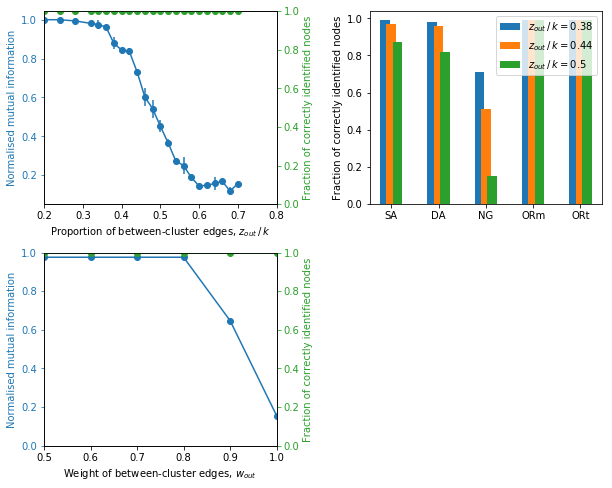

In [216]:
plt.figure(figsize=(10,8))
ax0 = plt.subplot(221)
plt.errorbar(z_out/16,meannMI_GN,stdnMI_GN,marker='o',c='C0')
ax0.set_xlabel(r'Proportion of between-cluster edges, $z_{out}\,/\,k$')
ax0.set_ylabel("Normalised mutual information", color='C0')
ax0.set_xlim([0.2, 0.8])
ax1.set_ylim([0, 1])
ax0.tick_params('y', colors='C0')
ax01 = ax0.twinx()
plt.errorbar(z_out/16,meanfracCC_GN,stdfracCC_GN,marker='o',c='C2')
ax01.tick_params('y', colors='C2')
ax01.set_ylabel('Fraction of correctly identified nodes', color='C2')
ax01.yaxis.set_label_position('right')
ax01.set_ylim([0, 1])

ax1 = plt.subplot(223)
plt.errorbar(2-w_in,meannMI_Fan,stdnMI_Fan,marker='o',c='C0')
ax1.set_xlabel(r'Weight of between-cluster edges, $w_{out}$')
ax1.set_ylabel("Normalised mutual information", color='C0')
ax1.set_xlim([0.5, 1])
ax1.set_ylim([0, 1])
ax1.tick_params('y', colors='C0')
ax11 = ax1.twinx()
plt.errorbar(2-w_in,meanfracCC_Fan,stdfracCC_Fan,marker='o',c='C2')
ax11.tick_params('y', colors='C2')
ax11.set_ylabel('Fraction of correctly identified nodes', color='C2')
ax11.yaxis.set_label_position('right')
ax11.set_ylim([0, 1])

ax2 = plt.subplot(222)
labels = ['SA', 'DA', 'NG', 'ORm', 'ORt']
zout6 = [0.99, 0.98, 0.71, 0.99, 0.99]
zout7 = [0.97, 0.96, 0.51, 0.99, 0.99]
zout8 = [0.87, 0.82, 0.15, 0.99, 0.99]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax2.bar(x - width/3*2, zout6, width, label=r'$z_{out}\,/\,k = 0.38$')
rects2 = ax2.bar(x , zout7, width, label=r'$z_{out}\,/\,k = 0.44$')
rects2 = ax2.bar(x + width/3*2, zout8, width, label=r'$z_{out}\,/\,k = 0.5$')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Fraction of correctly identified nodes')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax1.set_ylim([0, 1])
ax2.legend()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.25)

MI = np.zeros([NGraphs,n_t])
Stability = np.zeros([NGraphs,n_t])
NComms = np.zeros([NGraphs,n_t])
meanMI = np.zeros([n_t,len(p_in)])
meanStability = np.zeros([n_t,len(p_in)])
meanNComms = np.zeros([n_t,len(p_in)])
stdMI = np.zeros([n_t,len(p_in)])
stdStability = np.zeros([n_t,len(p_in)])
stdNComms = np.zeros([n_t,len(p_in)])
meannMI = np.zeros(len(p_in))     
stdnMI = np.zeros(len(p_in)) 
labels_gt = np.concatenate((np.zeros(32),np.ones(32),2*np.ones(32),3*np.ones(32)))
for i in range(len(p_in)):
    nMI = np.zeros(NGraphs)
    
    for k in range(NGraphs):
        gc.filename = 'graph_' + str(k) + '_p_in_' + str(p_in[i]) + '_cluster.pkl'
        stability_results = pickle.load(open(gc.filename,'rb'))
        MI[k] = np.array(stability_results[1]['MI'].values)
        Stability[k] = np.array(stability_results[1]['stability'].values)
        NComms[k] = np.array(stability_results[1]['number_of_communities'].values)
        #print(stability_results[1]['number_of_communities'].values)
        times = np.log10(stability_results[1]['Markov time'].values)#variation of optimal markov time with pin
        labels = np.array(stability_results[1]['community_id'].values)
        nMItemp = np.zeros(n_t)
        for l in range(n_t):
            nMItemp[l] = metrics.normalized_mutual_info_score(labels_gt,labels[l],average_method='arithmetic') 
        nMI[k] = np.max(nMItemp)
        
    meanMI[:,i] = np.mean(MI,0)   
    meanStability[:,i] = np.mean(Stability,0) 
    meanNComms[:,i] = np.mean(NComms,0)
    stdMI[:,i] = np.std(MI,0)  
    stdStability[:,i] = np.std(Stability,0)
    stdNComms[:,i] = np.std(NComms,0)
    
    meannMI[i] = np.mean(nMI)
    stdnMI[i] = np.std(nMI)

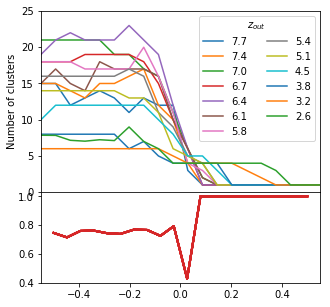

In [122]:
plt.figure(figsize=(5,5))

gs = gridspec.GridSpec(2, 1, height_ratios = [1., 0.5])
gs.update(hspace=0)
 
labels = []    
ax0 = plt.subplot(gs[0, 0])
for i in range(len(p_in)):
    ax0.plot(times, meanNComms[:,i]) 
    labels.append(str(round(z_out[i],1)))
ax0.yaxis.tick_left()
ax0.yaxis.set_label_position('left')
ax0.axis([times[0],times[-1],0,25])
ax0.set_ylabel('Number of clusters')
ax0.legend(labels,ncol=2,title=r'$z_{out}$')

#plot the number of clusters
#ax1 = ax0.twinx()
#ax1.plot(times, meanNComms,label='size',lw=2.)  
#for i in range(len(p_in)):
#    ax1.plot(times, meanNComms[:,i]-stdNComms[:,i], meanNComms[:,i]+stdNComms[:,i])
#ax1.yaxis.tick_right()
#ax1.tick_params('y', colors='C0')
#ax1.yaxis.set_label_position('right')

    
ax2 = plt.subplot(gs[1, 0])

#first plot the stability
#ax2.plot(times, meanStability[:,0], label=r'$Q$',c='C2')
#ax2.fill_between(times, meanStability[:,0]-stdStability[:,0], meanStability[:,0]+stdStability[:,0])
#ax2.set_yscale('log') 
#ax2.tick_params('y', colors='C2')
#ax2.set_ylabel('Modularity', color='C2')
#ax2.yaxis.set_label_position('left')
#ax2.set_xlabel(r'$log_{10}(t)$')

#plot the MI
#ax3 = ax2.twinx()
#ax3.plot(times, meanMI[:,0],'-',lw=2.,c='C3',label='MI')
for i in range(len(p_in)):
    ax2.plot(times, meanMI[:,0],'-',lw=2.,c='C3',label='MI')
#    ax3.fill_between(times, meanMI[:,i]-stdMI[:,i], meanMI[:,i]+stdMI[:,i])
#ax3.yaxis.tick_right()
#ax3.tick_params('y', colors='C3')
#ax3.set_ylabel(r'Mutual information', color='C3')
#ax3.axhline(1,ls='--',lw=1.,c='C3')
#ax3.axis([times[0], times[-1], 0,1.1])